# Capstone 2: Exploratory Data Analysis<a id='Exploratory_Data_Analysis'></a>

## Contents<a id='Contents'></a>
* [Exploratory Data Analysis](#Exploratory_Data_Analysis)
  * [Contents](#Contents)
  * [Introduction](#Introduction)
  * [Imports](#Imports)
  * [Load the Data](#Load_the_Data)
    * [Data with Zeros for NaN Markdown Values](#Data_with_Zeros_for_NaN_Markdown_Values)
    * [Data with Dropped Markdown Values](#Data_with_Dropped_Markdown_Values)
  * [Explore the Data](#Explore_the_Data)
    * [Visualize Correlations](#Visualize_Correlations)
    * [Correlation Matrix Heatmaps](#Correlation_Matrix_Heatmaps)
  * [Summary](#Summary)

## Introduction<a id='Introduction'></a>

From the initial data wrangling, I want to be able to predict weekly sales of each store or potentially by each department. I've created two dataframes, one where we dropped the markdown columns and one where we replaced the NaN values of the markdown columns with zeros.

## Imports<a id='Imports'></a>

In [8]:
#Import libraries
# Import relevant libraries and packages.
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns # For all our visualization needs.
import statsmodels.api as sm #This is a python module which provides classes and functions for the estimation of different statistical models, conducting statistical tests, and statistical EDA.
from statsmodels.graphics.api import abline_plot # For visualizing evaluating predictions.
from sklearn.metrics import mean_squared_error, r2_score #The mean_squared error is the average squared difference between the estimated values and true value. The r2_score is used to determine how the variability of one factor can be caused by its relationship to another related factor.
from sklearn.model_selection import train_test_split # To split the data.
from sklearn import linear_model, preprocessing # The linear model is the ordinary least squares linear regression model. Preprocessing helps to standardize a data set. If some outliers are present in the set, robust scalers or transformers are more appropriate.
import warnings # For handling error messages.
# Don't worry about the following two instructions: they just suppress warnings that could occur later. 
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings(action='ignore', module='scipy', message='^internal gelsd')
import os
from library.sb_utils import save_file

## Load the Data<a id='Load_the_Data'></a>

In [9]:
#Load the CSV data from the data wrangling notebook
data_all_0 = pd.read_csv('C:/Users/jmhat/Desktop/Coding/Capstone2/data/data_all_0.csv')
data_no_nan = pd.read_csv('C:/Users/jmhat/Desktop/Coding/Capstone2/data/data_no_nan.csv')

###  Data with Zeros for NaN Markdown Values<a id='Data_with_Zeros_for_NaN_Markdown_Values'></a>

In [6]:
data_all_0.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Size,Type_B,Type_C
0,1,733894,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0,1.0,24924.50,151315,0,0
1,1,733894,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0,2.0,50605.27,151315,0,0
2,1,733894,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0,3.0,13740.12,151315,0,0
3,1,733894,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0,4.0,39954.04,151315,0,0
4,1,733894,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0,5.0,32229.38,151315,0,0


In [7]:
data_all_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Date          421570 non-null  int64  
 2   Temperature   421570 non-null  float64
 3   Fuel_Price    421570 non-null  float64
 4   MarkDown1     421570 non-null  float64
 5   MarkDown2     421570 non-null  float64
 6   MarkDown3     421570 non-null  float64
 7   MarkDown4     421570 non-null  float64
 8   MarkDown5     421570 non-null  float64
 9   CPI           421570 non-null  float64
 10  Unemployment  421570 non-null  float64
 11  IsHoliday     421570 non-null  int64  
 12  Dept          421570 non-null  float64
 13  Weekly_Sales  421570 non-null  float64
 14  Size          421570 non-null  int64  
 15  Type_B        421570 non-null  int64  
 16  Type_C        421570 non-null  int64  
dtypes: float64(11), int64(6)
memory usage: 54.7 MB


In [8]:
data_all_0.describe()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Size,Type_B,Type_C
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,734307.233238,60.090059,3.361027,2590.074819,879.974298,468.087665,1083.132268,1662.772385,171.201947,7.960289,0.070358,44.260317,15981.258123,136727.915739,0.387824,0.101044
std,12.785297,294.749986,18.447931,0.458515,6052.385934,5084.538801,5528.873453,3894.529945,4207.629321,39.159276,1.863296,0.255750,30.492054,22711.183519,60980.583328,0.487255,0.301387
min,1.000000,733782.000000,-2.060000,2.472000,0.000000,-265.760000,-29.100000,0.000000,0.000000,126.064000,3.879000,0.000000,1.000000,-4988.940000,34875.000000,0.000000,0.000000
25%,11.000000,734057.000000,46.680000,2.933000,0.000000,0.000000,0.000000,0.000000,0.000000,132.022667,6.891000,0.000000,18.000000,2079.650000,93638.000000,0.000000,0.000000
50%,22.000000,734305.000000,62.090000,3.452000,0.000000,0.000000,0.000000,0.000000,0.000000,182.318780,7.866000,0.000000,37.000000,7612.030000,140167.000000,0.000000,0.000000
75%,33.000000,734564.000000,74.280000,3.738000,2809.050000,2.200000,4.540000,425.290000,2168.040000,212.416993,8.572000,0.000000,74.000000,20205.852500,202505.000000,1.000000,0.000000
max,45.000000,734847.000000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,1.000000,99.000000,693099.360000,219622.000000,1.000000,1.000000


###  Data with Dropped Markdown Values<a id='Data_with_Dropped_Markdown_Values'></a>

In [9]:
data_no_nan.head()

,Store,Date,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Size,Type_B,Type_C
0,1,733894,42.31,2.572,211.096358,8.106,0,1.0,24924.50,151315,0,0
1,1,733894,42.31,2.572,211.096358,8.106,0,2.0,50605.27,151315,0,0
2,1,733894,42.31,2.572,211.096358,8.106,0,3.0,13740.12,151315,0,0
3,1,733894,42.31,2.572,211.096358,8.106,0,4.0,39954.04,151315,0,0
4,1,733894,42.31,2.572,211.096358,8.106,0,5.0,32229.38,151315,0,0


In [10]:
data_no_nan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Date          421570 non-null  int64  
 2   Temperature   421570 non-null  float64
 3   Fuel_Price    421570 non-null  float64
 4   CPI           421570 non-null  float64
 5   Unemployment  421570 non-null  float64
 6   IsHoliday     421570 non-null  int64  
 7   Dept          421570 non-null  float64
 8   Weekly_Sales  421570 non-null  float64
 9   Size          421570 non-null  int64  
 10  Type_B        421570 non-null  int64  
 11  Type_C        421570 non-null  int64  
dtypes: float64(6), int64(6)
memory usage: 38.6 MB


In [11]:
data_no_nan.describe()

,Store,Date,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Size,Type_B,Type_C
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,734307.233238,60.090059,3.361027,171.201947,7.960289,0.070358,44.260317,15981.258123,136727.915739,0.387824,0.101044
std,12.785297,294.749986,18.447931,0.458515,39.159276,1.863296,0.255750,30.492054,22711.183519,60980.583328,0.487255,0.301387
min,1.000000,733782.000000,-2.060000,2.472000,126.064000,3.879000,0.000000,1.000000,-4988.940000,34875.000000,0.000000,0.000000
25%,11.000000,734057.000000,46.680000,2.933000,132.022667,6.891000,0.000000,18.000000,2079.650000,93638.000000,0.000000,0.000000
50%,22.000000,734305.000000,62.090000,3.452000,182.318780,7.866000,0.000000,37.000000,7612.030000,140167.000000,0.000000,0.000000
75%,33.000000,734564.000000,74.280000,3.738000,212.416993,8.572000,0.000000,74.000000,20205.852500,202505.000000,1.000000,0.000000
max,45.000000,734847.000000,100.140000,4.468000,227.232807,14.313000,1.000000,99.000000,693099.360000,219622.000000,1.000000,1.000000


## Explore the Data<a id='Explore_the_Data'></a>

### Visualize Correlations<a id='Visualize_Correlations'></a>

Since the data between the two dataframes is exactly the same except for the markdown columns, I will only show histograms, line, and scatter plots for the dataframe where I filled in NaN values for the Markdown column values with 0.

array([[<AxesSubplot:title={'center':'Store'}>,
        <AxesSubplot:title={'center':'Date'}>,
        <AxesSubplot:title={'center':'Temperature'}>,
        <AxesSubplot:title={'center':'Fuel_Price'}>],
       [<AxesSubplot:title={'center':'MarkDown1'}>,
        <AxesSubplot:title={'center':'MarkDown2'}>,
        <AxesSubplot:title={'center':'MarkDown3'}>,
        <AxesSubplot:title={'center':'MarkDown4'}>],
       [<AxesSubplot:title={'center':'MarkDown5'}>,
        <AxesSubplot:title={'center':'CPI'}>,
        <AxesSubplot:title={'center':'Unemployment'}>,
        <AxesSubplot:title={'center':'IsHoliday'}>],
       [<AxesSubplot:title={'center':'Dept'}>,
        <AxesSubplot:title={'center':'Weekly_Sales'}>,
        <AxesSubplot:title={'center':'Size'}>,
        <AxesSubplot:title={'center':'Type_B'}>],
       [<AxesSubplot:title={'center':'Type_C'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

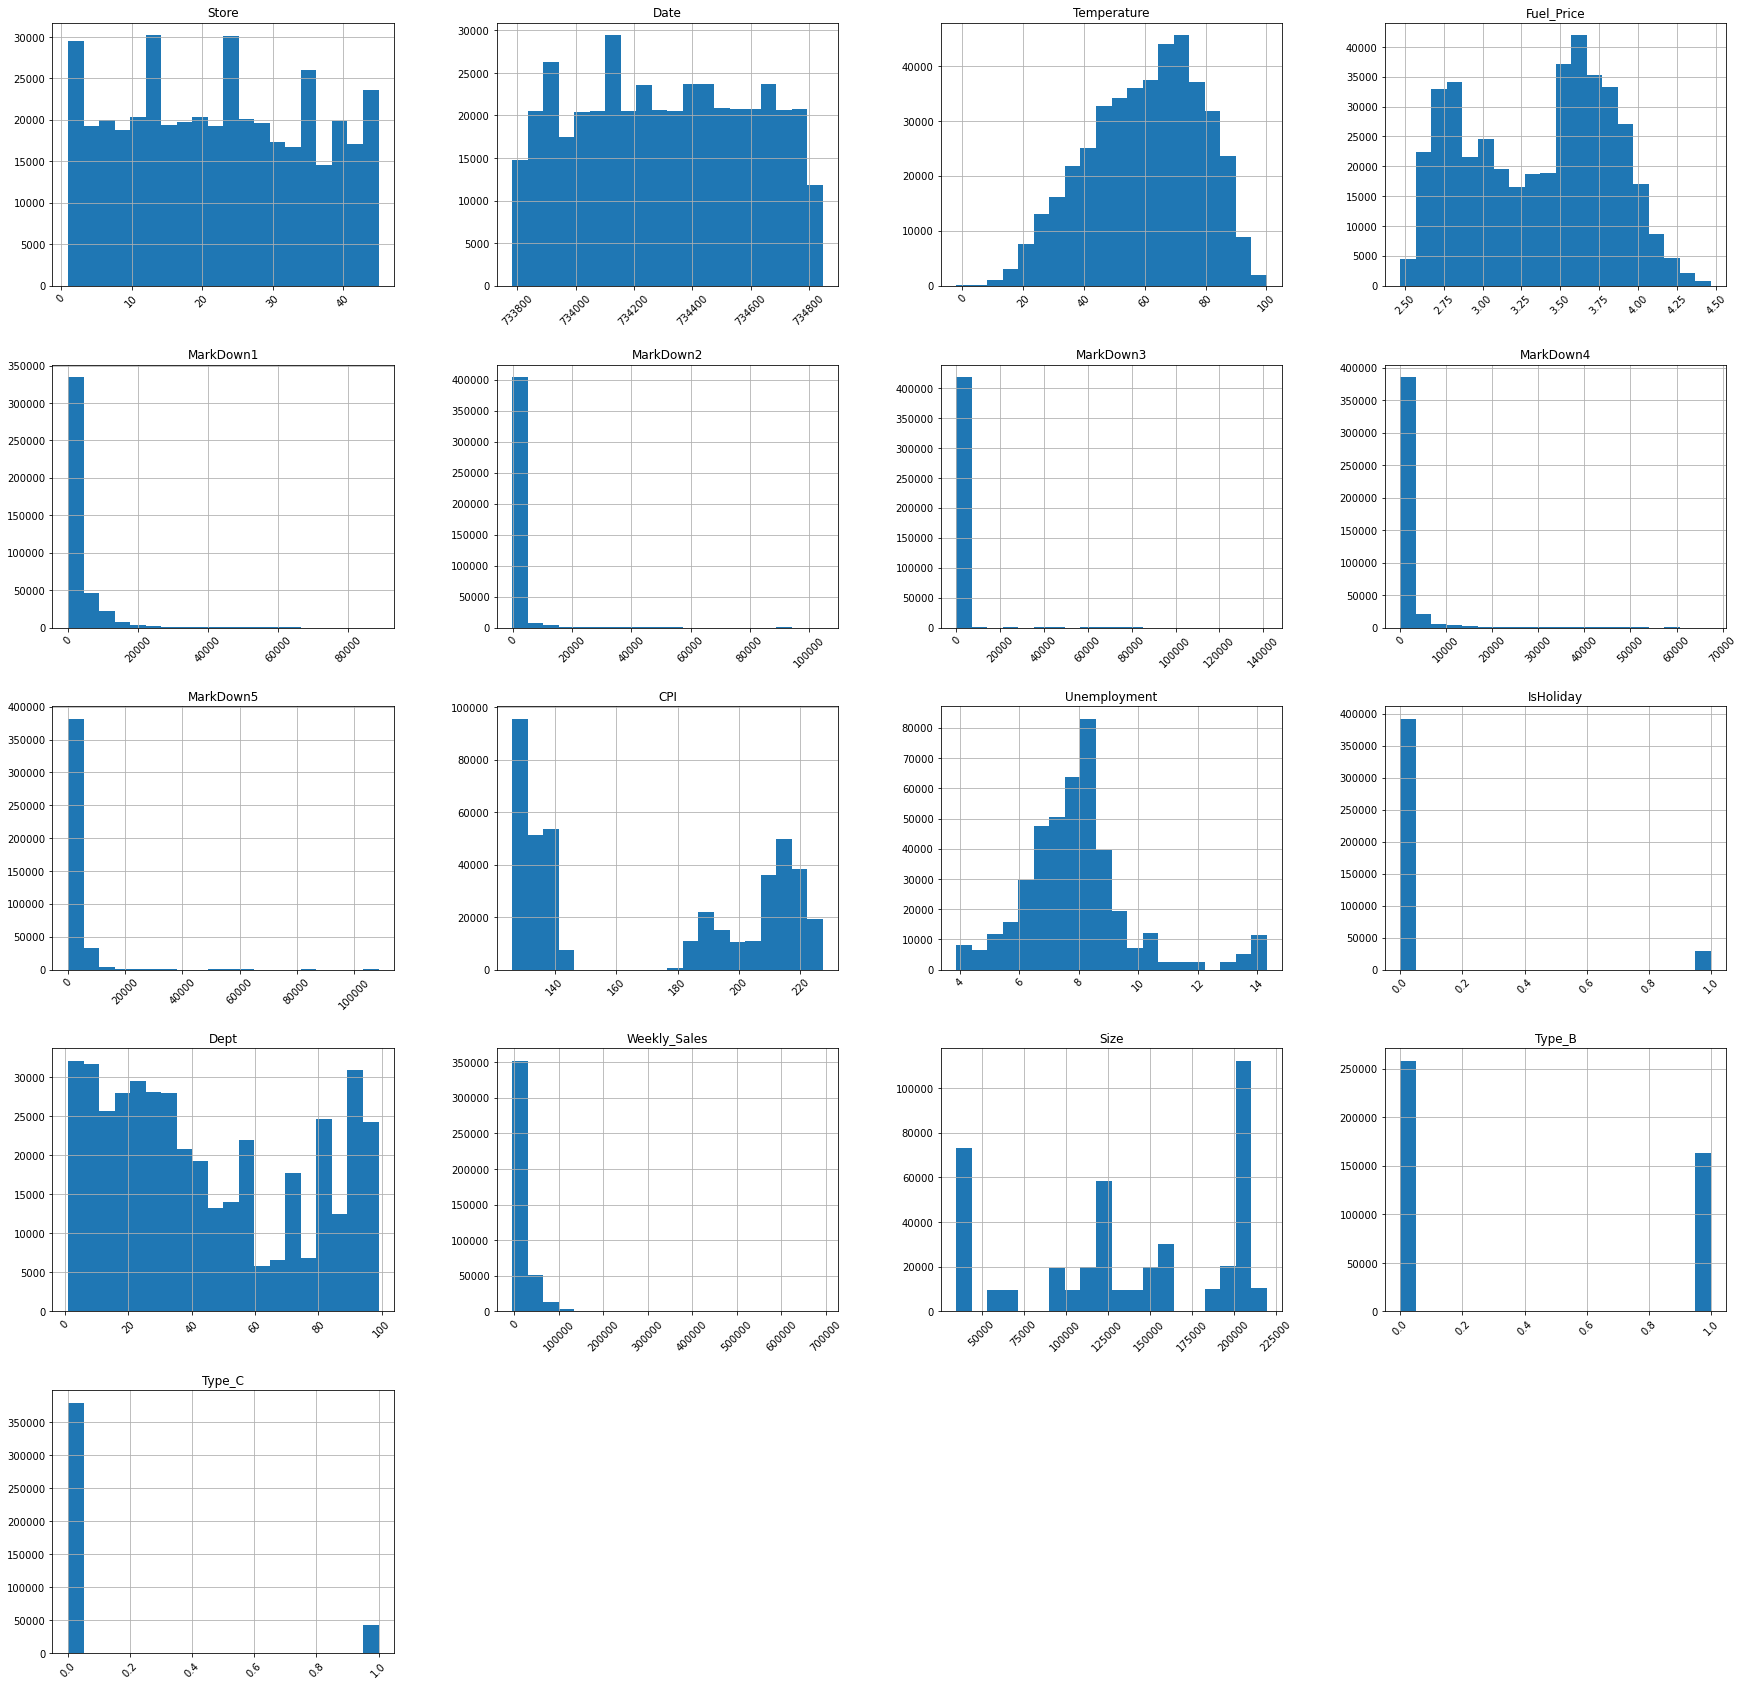

In [17]:
data_all_0.hist(bins=20, figsize=(30,30), xrot=45)

I used the histograms to see if there were any interesting trends in the dataframe values. Temperature and unemployment seem to have a normal distribution while fuel price and CPI have a more bimodal type of distribution. Size does not appear to have any particular trends and every markdown and the weekly sales are right-skewed.

Next, I wanted to get an idea of the sales values for holidays and regular work days. To do this, I created two new dataframes, one with just holidays and the other with just normal shopping days.

In [25]:
#Make two new dataframes with one being for holidays and the other regular days.
data_no_nan_noholiday = data_no_nan.loc[data_no_nan['IsHoliday'] == 0]
data_no_nan_isholiday = data_no_nan.loc[data_no_nan['IsHoliday'] == 1]

<AxesSubplot:>

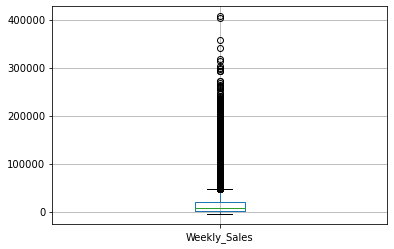

In [31]:
#Box plots showing weekly sales on normal days versus weekly sales on holidays.
data_no_nan_noholiday.boxplot(column='Weekly_Sales')

<AxesSubplot:>

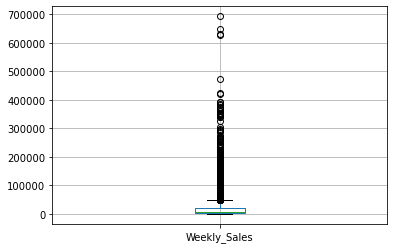

In [27]:
data_no_nan_isholiday.boxplot(column='Weekly_Sales')

The box and whiskers portion of both dataframes seem to show that most sales are relatively similar. Looking at the outliers, holidays do seem to have a few more datapoints with very high sales compared to normal days.

###  Plot the Correlation Matrix Heatmaps<a id='Correlation_Matrix_Heatmaps'></a>

I've removed all the categorical variables for the correlation matrix heatmaps below

In [17]:
data_0_cont = data_all_0.drop(columns=['Store', 'Date', 'IsHoliday', 'Dept', 'Type_B', 'Type_C'])

In [18]:
data_0_cont.head()

,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Weekly_Sales,Size
0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,24924.50,151315
1,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,50605.27,151315
2,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,13740.12,151315
3,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,39954.04,151315
4,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,32229.38,151315


In [20]:
data_nan_cont = data_no_nan.drop(columns=['Store', 'Date', 'IsHoliday', 'Dept', 'Type_B', 'Type_C'])

In [21]:
data_nan_cont.head()

,Temperature,Fuel_Price,CPI,Unemployment,Weekly_Sales,Size
0,42.31,2.572,211.096358,8.106,24924.50,151315
1,42.31,2.572,211.096358,8.106,50605.27,151315
2,42.31,2.572,211.096358,8.106,13740.12,151315
3,42.31,2.572,211.096358,8.106,39954.04,151315
4,42.31,2.572,211.096358,8.106,32229.38,151315


Correlation between various features all 0


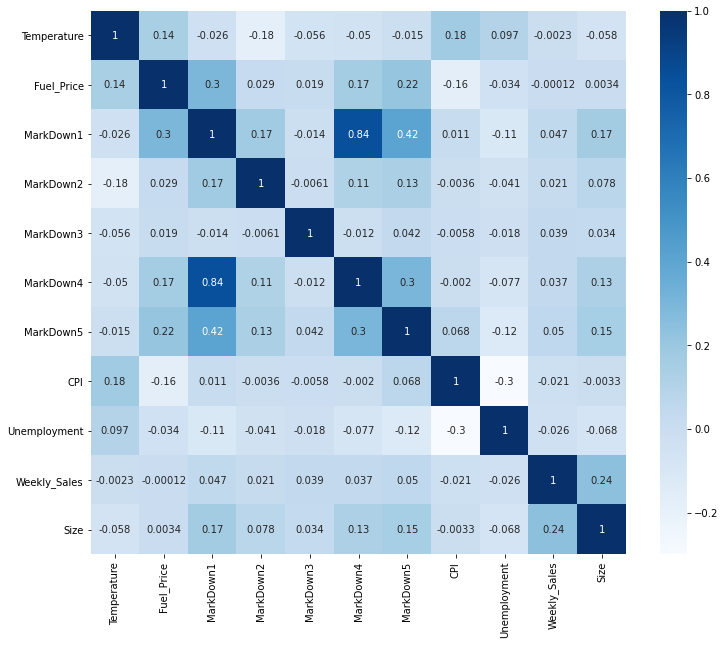

In [19]:
plt.figure(figsize=(12,10))
print('Correlation between various features all 0')
p=sns.heatmap(data_0_cont.corr(), annot=True,cmap ='Blues')

Correlation between various features no NaN


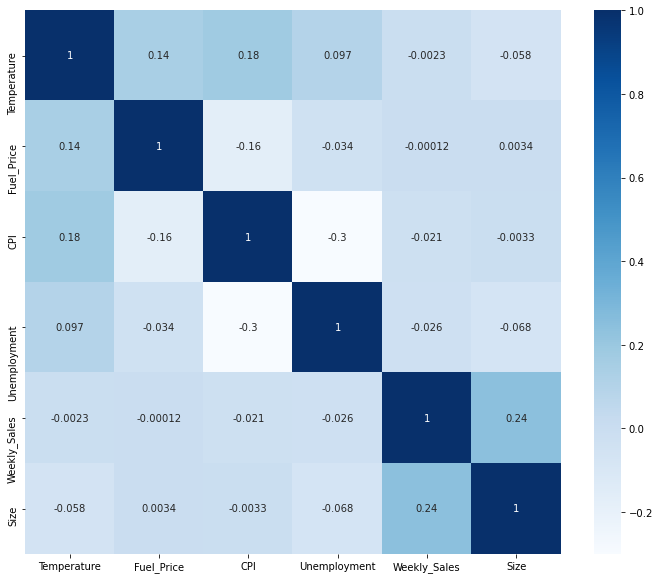

In [22]:
plt.figure(figsize=(12,10))
print('Correlation between various features no NaN')
p=sns.heatmap(data_nan_cont.corr(), annot=True,cmap ='Blues')

There seems to be a few interesting correlations occuring as shown on the heat maps. We are interested in correlations with weekly sales, which seems to show positive correlations with the size of the store and markdown columns. All the other features showed negative correlations with weekly sales. Even though size had the highest positive correlation, it was only 0.24 which is still a low value. Interestingly, the markdown features had high positive correlations with each other and a few higher positive correlations with fuel price. The rest of the correlations were either positive or negative but very low.

## Summary<a id='Summary'></a>

After looking at the histograms and boxplots of my data, there are a few features with interesting data distributions. The correlation matrix heatmaps seemed to show there may not be many positive or negative correlations between different features and the weekly sales. We did take out the categorical variables when looking at the correlations, so there may yet be some strong correlations between the categorical variables and weeekly sales when I look into the regression analysis.